In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53939 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53939 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    1
depth      0
table      0
price      0
x          1
y          0
z          0
dtype: int64

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.duplicated().sum()

146

In [8]:
df.drop_duplicates(keep = "first", inplace = True)
df.duplicated().sum()

0

In [9]:
df.describe(include = ["float64", "int64"])

,carat,depth,table,price,x,y,z
count,53792.000000,53792.000000,53792.000000,53792.000000,53792.000000,53792.000000,53792.00000
mean,0.797781,61.748080,57.458051,3933.107971,5.731211,5.734647,3.53871
std,0.473399,1.429933,2.233701,3988.182396,1.120715,1.141230,0.70505
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.91000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.53000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.03000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.80000


In [10]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53792 non-null  float64 
 1   cut      53792 non-null  category
 2   color    53792 non-null  category
 3   clarity  53792 non-null  category
 4   depth    53792 non-null  float64 
 5   table    53792 non-null  float64 
 6   price    53792 non-null  int64   
 7   x        53792 non-null  float64 
 8   y        53792 non-null  float64 
 9   z        53792 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [12]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'ideal', 'very good']
Categories (7, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'ideal', 'very good']

In [13]:
df["cut"] = df["cut"].str.capitalize()
df["cut"] = df["cut"].astype("category")
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very good']

In [14]:
mapping_dict = {"Fair": 1,
               "Good": 2,
               "Very good": 3,
               "Premium": 4,
               "Ideal": 5}

df["cut_encoded"] = df["cut"].map(mapping_dict).astype("int64")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   carat        53792 non-null  float64 
 1   cut          53792 non-null  category
 2   color        53792 non-null  category
 3   clarity      53792 non-null  category
 4   depth        53792 non-null  float64 
 5   table        53792 non-null  float64 
 6   price        53792 non-null  int64   
 7   x            53792 non-null  float64 
 8   y            53792 non-null  float64 
 9   z            53792 non-null  float64 
 10  cut_encoded  53792 non-null  int64   
dtypes: category(3), float64(6), int64(2)
memory usage: 3.8 MB


In [16]:
df["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', '8']
Categories (9, object): ['8', 'I1', 'IF', 'SI1', ..., 'VS1', 'VS2', 'VVS1', 'VVS2']

In [17]:
df["clarity"] = df["clarity"].cat.remove_categories(removals = "8")
df["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', NaN]
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

In [18]:
df["clarity"].fillna(mode(df["clarity"]), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   carat        53792 non-null  float64 
 1   cut          53792 non-null  category
 2   color        53792 non-null  category
 3   clarity      53792 non-null  category
 4   depth        53792 non-null  float64 
 5   table        53792 non-null  float64 
 6   price        53792 non-null  int64   
 7   x            53792 non-null  float64 
 8   y            53792 non-null  float64 
 9   z            53792 non-null  float64 
 10  cut_encoded  53792 non-null  int64   
dtypes: category(3), float64(6), int64(2)
memory usage: 3.8 MB


In [19]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
df["clarity"] = pd.Categorical(df["clarity"], categories = clarity_order, ordered = True)
df["clarity_encoded"] = df["clarity"].cat.codes
df["clarity_encoded"] = df["clarity_encoded"].astype("int64") + 1
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53792 non-null  float64 
 1   cut              53792 non-null  category
 2   color            53792 non-null  category
 3   clarity          53792 non-null  category
 4   depth            53792 non-null  float64 
 5   table            53792 non-null  float64 
 6   price            53792 non-null  int64   
 7   x                53792 non-null  float64 
 8   y                53792 non-null  float64 
 9   z                53792 non-null  float64 
 10  cut_encoded      53792 non-null  int64   
 11  clarity_encoded  53792 non-null  int64   
dtypes: category(3), float64(6), int64(3)
memory usage: 4.3 MB


In [21]:
df["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D', 'e']
Categories (8, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'e']

In [22]:
df["color"] = df["color"].str.upper()
df["color"] = df["color"].astype("category")
df["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [23]:
def draw_histogram(data, col):
    sns.histplot(data = data, x = col, kde = True)
    plt.title(f"Histogram Visualiztion for {col} column")
    plt.xlabel(f"{col}")
    plt.show();

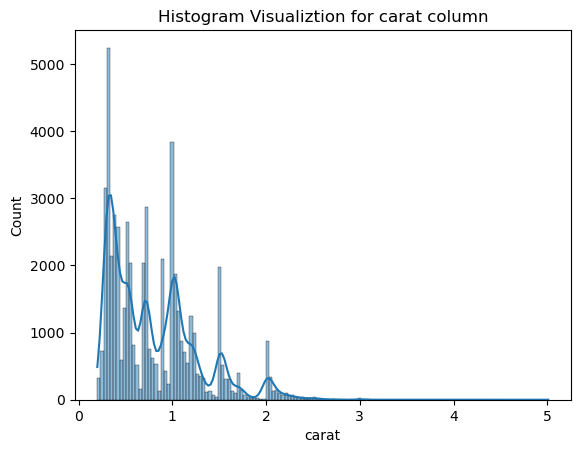

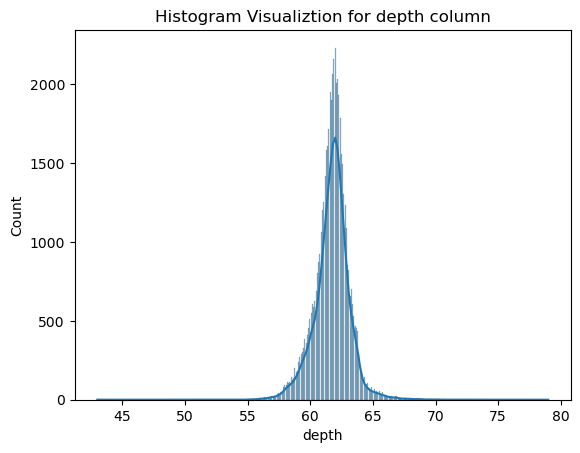

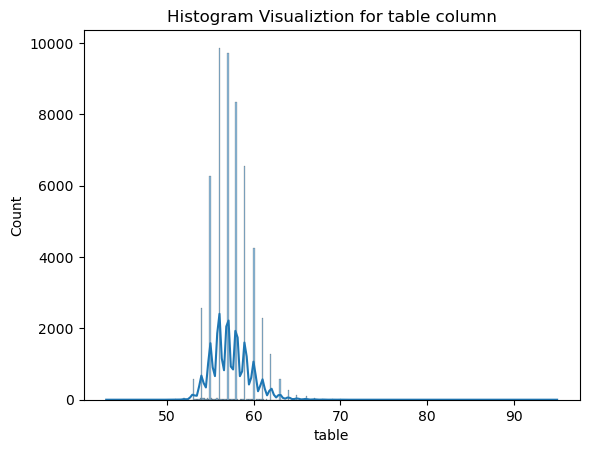

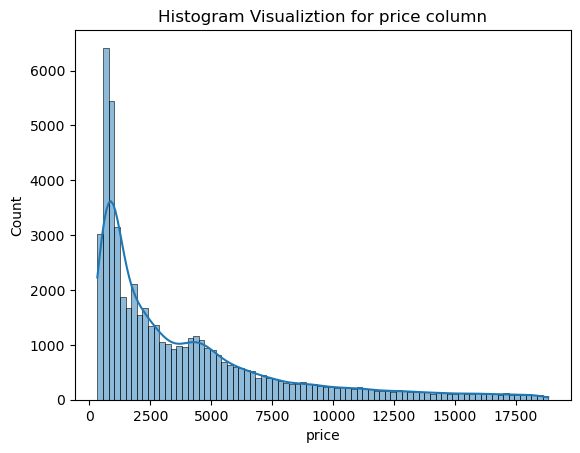

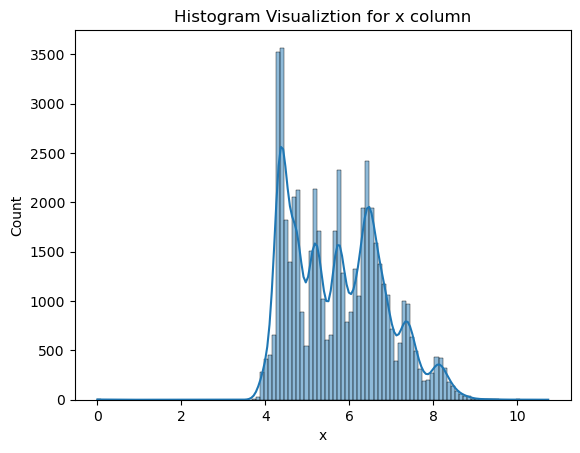

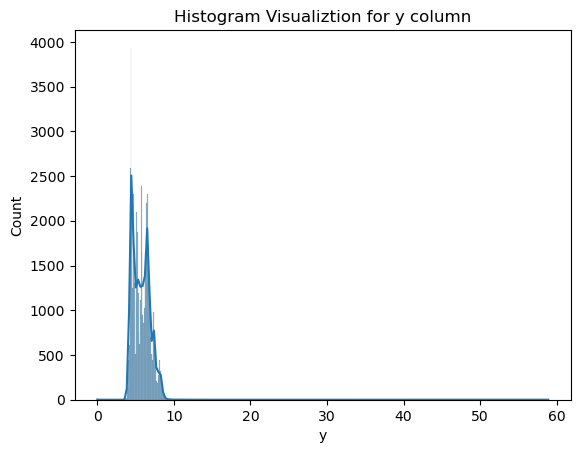

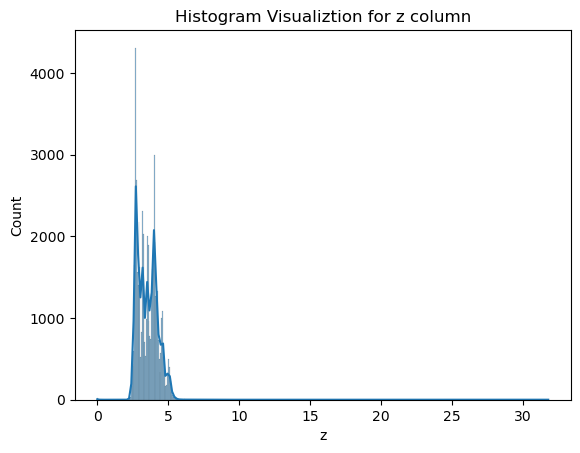

In [24]:
for col in df.select_dtypes(include = ["int64", "float64"]):
    if col != "cut_encoded" and col != "clarity_encoded":
        draw_histogram(df, col)

In [25]:
def draw_boxplots(data, col):
    sns.boxplot(data = data, x = col)
    plt.title(f"Box Plot Visualiztion for {col} column")
    plt.xlabel(f"{col}")
    plt.show();

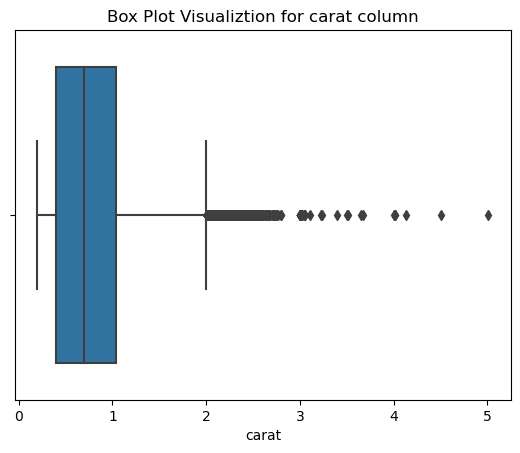

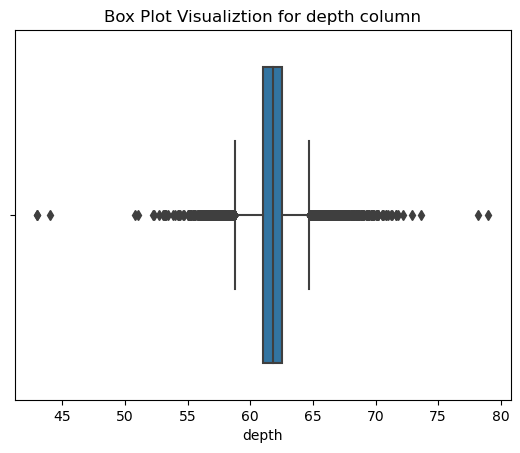

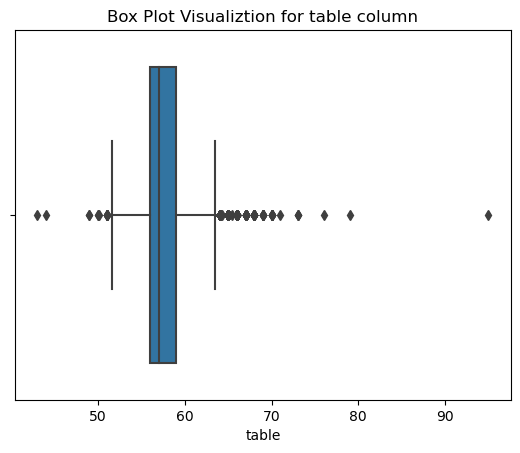

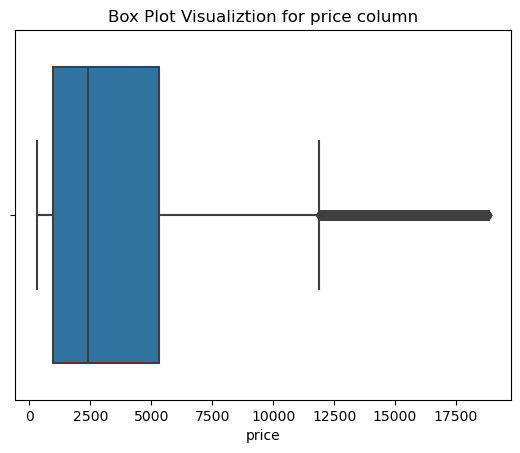

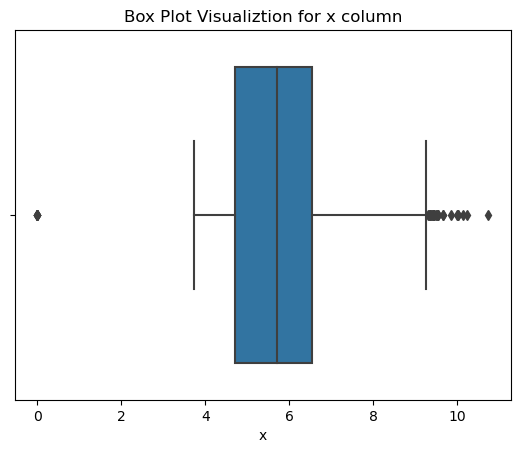

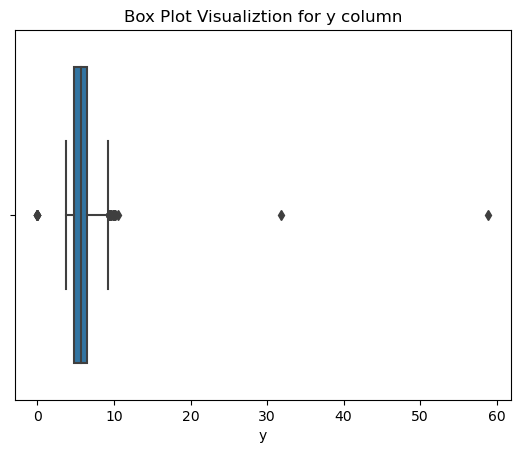

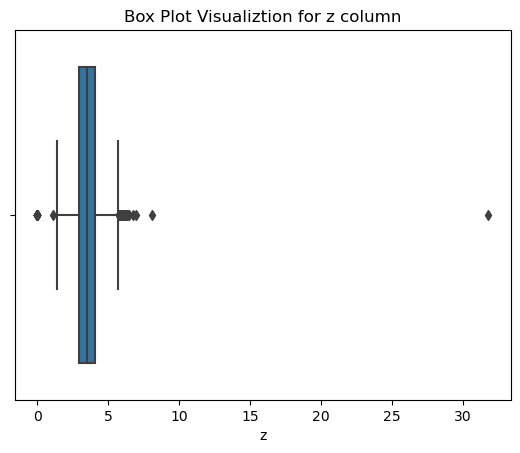

In [26]:
for col in df.select_dtypes(include = ["int64", "float64"]):
    if col != "cut_encoded" and col != "clarity_encoded":
        draw_boxplots(df, col)

In [27]:
def draw_countplots(data, col):
    sns.countplot(data = data, x = col)
    plt.title(f"Count Plot Visualiztion for {col} column")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequence")
    plt.show();

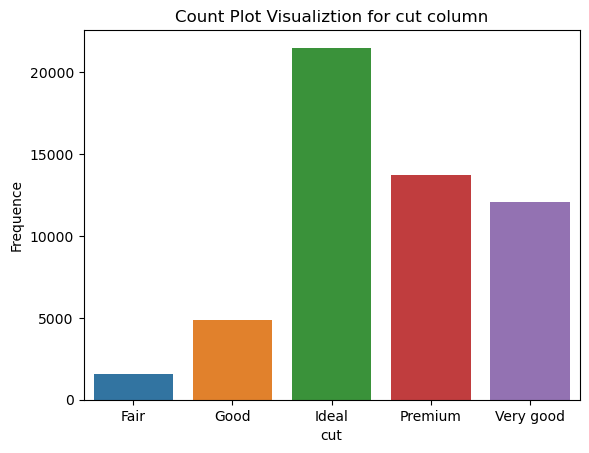

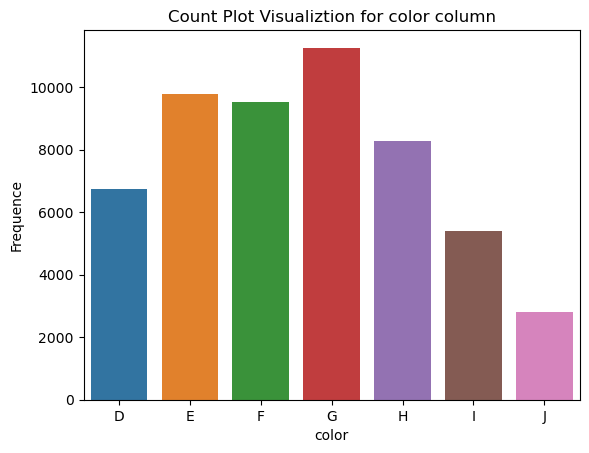

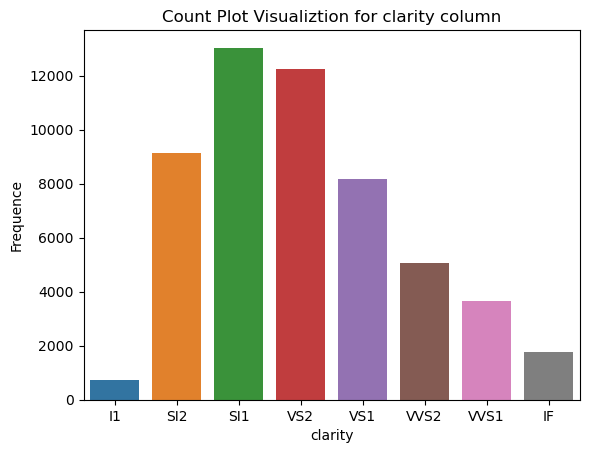

In [28]:
for col in df.select_dtypes("category"):
    draw_countplots(df, col)

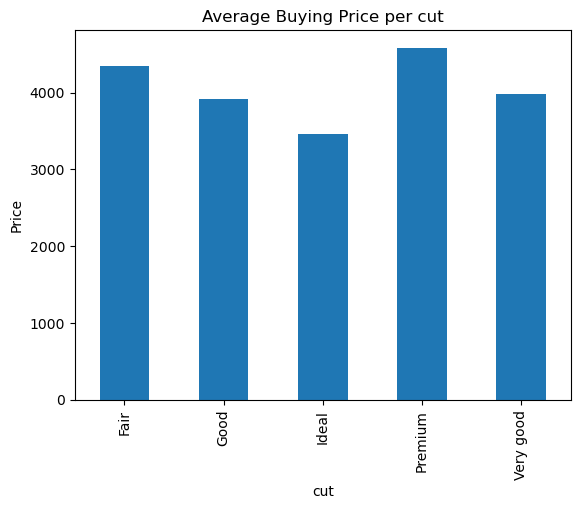

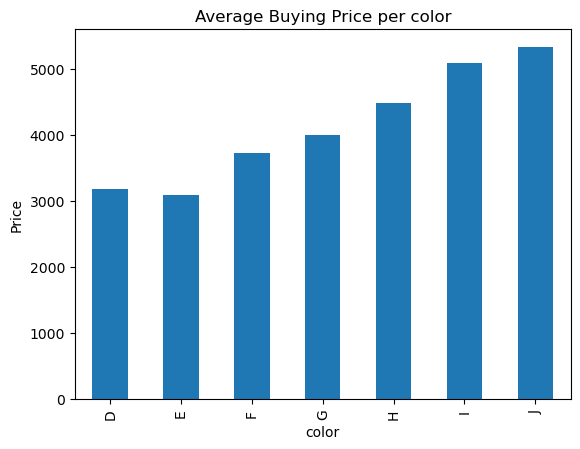

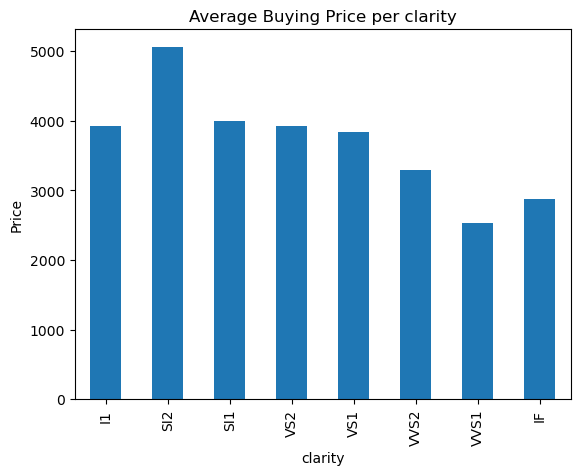

In [29]:
for col in ["cut", "color", "clarity"]:
    df.groupby(col)["price"].mean().plot(kind = "bar")
    plt.title(f"Average Buying Price per {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Price")
    plt.show();

In [30]:
df = pd.get_dummies(df, columns = ["color"])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,0,1,0,0,0,0,0
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3,0,1,0,0,0,0,0
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,2,5,0,1,0,0,0,0,0
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4,0,0,0,0,0,1,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2,0,0,0,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53792 non-null  float64 
 1   cut              53792 non-null  category
 2   clarity          53792 non-null  category
 3   depth            53792 non-null  float64 
 4   table            53792 non-null  float64 
 5   price            53792 non-null  int64   
 6   x                53792 non-null  float64 
 7   y                53792 non-null  float64 
 8   z                53792 non-null  float64 
 9   cut_encoded      53792 non-null  int64   
 10  clarity_encoded  53792 non-null  int64   
 11  color_D          53792 non-null  uint8   
 12  color_E          53792 non-null  uint8   
 13  color_F          53792 non-null  uint8   
 14  color_G          53792 non-null  uint8   
 15  color_H          53792 non-null  uint8   
 16  color_I          53792 non-null  uint8  

In [32]:
for col in df.columns:
    if col.startswith("color"):
        df[col] = df[col].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53792 non-null  float64 
 1   cut              53792 non-null  category
 2   clarity          53792 non-null  category
 3   depth            53792 non-null  float64 
 4   table            53792 non-null  float64 
 5   price            53792 non-null  int64   
 6   x                53792 non-null  float64 
 7   y                53792 non-null  float64 
 8   z                53792 non-null  float64 
 9   cut_encoded      53792 non-null  int64   
 10  clarity_encoded  53792 non-null  int64   
 11  color_D          53792 non-null  int64   
 12  color_E          53792 non-null  int64   
 13  color_F          53792 non-null  int64   
 14  color_G          53792 non-null  int64   
 15  color_H          53792 non-null  int64   
 16  color_I          53792 non-null  int64  

In [33]:
standard_scaler = StandardScaler()
df["depth_scaled"] = standard_scaler.fit_transform(df[["depth"]])
df["x_scaled"] = standard_scaler.fit_transform(df[["x"]])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J,depth_scaled,x_scaled
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,0,1,0,0,0,0,0,-0.173492,-1.589366
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3,0,1,0,0,0,0,0,-1.362370,-1.642904
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,2,5,0,1,0,0,0,0,0,-3.390456,-1.500137
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4,0,0,0,0,0,1,0,0.455914,-1.366293
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2,0,0,0,0,0,0,1,1.085320,-1.241371


In [34]:
df["log_price"] = np.log1p(df["price"])
df["log_y"] = np.log1p(df["y"])
df["log_z"] = np.log1p(df["z"])
df["log_table"] = np.log1p(df["table"])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,cut_encoded,...,color_G,color_H,color_I,color_J,depth_scaled,x_scaled,log_price,log_y,log_z,log_table
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,5,...,0,0,0,0,-0.173492,-1.589366,5.789960,1.605430,1.232560,4.025352
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,4,...,0,0,0,0,-1.362370,-1.642904,5.789960,1.576915,1.196948,4.127134
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,2,...,0,0,0,0,-3.390456,-1.500137,5.793014,1.623341,1.196948,4.189655
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,4,...,0,0,1,0,0.455914,-1.366293,5.814131,1.654411,1.289233,4.077537
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,2,...,0,0,0,1,1.085320,-1.241371,5.817111,1.677097,1.321756,4.077537


In [35]:
robust_scaler = RobustScaler()
df["carat_scaled"] = robust_scaler.fit_transform(df[["carat"]])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,cut_encoded,...,color_H,color_I,color_J,depth_scaled,x_scaled,log_price,log_y,log_z,log_table,carat_scaled
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,5,...,0,0,0,-0.173492,-1.589366,5.789960,1.605430,1.232560,4.025352,-0.734375
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,4,...,0,0,0,-1.362370,-1.642904,5.789960,1.576915,1.196948,4.127134,-0.765625
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,2,...,0,0,0,-3.390456,-1.500137,5.793014,1.623341,1.196948,4.189655,-0.734375
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,4,...,0,1,0,0.455914,-1.366293,5.814131,1.654411,1.289233,4.077537,-0.640625
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,2,...,0,0,1,1.085320,-1.241371,5.817111,1.677097,1.321756,4.077537,-0.609375
